<a href="https://colab.research.google.com/github/shyamsparrow/Jan-G4---NLP-Chatbot/blob/Models/Hybrid_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - NLP Chatbot

### DOMAIN: 
Industrial safety. NLP based Chatbot.

### CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

### Columns description:
* Data: timestamp or time/date information
* Countries: which country the accident occurred (anonymised)
* Local: the city where the manufacturing plant is located (anonymised)
* Industry sector: which sector the plant belongs to
* Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
* Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have   been (due to other factors involved in the accident)
* Gender: if the person is male of female
* Employee or Third Party: if the injured person is an employee or a third party
* Critical Risk: some description of the risk involved in the accident
* Description: Detailed description of how the accident happened.

Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing,
Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

### PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

# Connecting to Git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Replace the folder path with your drive folder path and clone the githb repo

In [ ]:
%cd /content/drive/MyDrive/AIML/Capstone

/content/drive/MyDrive/AIML/Capstone


Run the below code for clone the repo in our Googele drive for first time

In [ ]:
! git clone https://github.com/shyamsparrow/Jan-G4---NLP-Chatbot.git

fatal: destination path 'Jan-G4---NLP-Chatbot' already exists and is not an empty directory.


Change the Current folder into Github repo main folder, all the functions we are calling has to be in this repo.

In [ ]:
%cd /content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot

/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot


In [ ]:
!git checkout main

Already on 'main'
Your branch is up to date with 'origin/main'.


In [ ]:
!git pull

Already up to date.


Run this code to update the changes in repo to our drive

# Data Preprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import config
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
industry_df = pd.read_csv("industry_df_preprocessed.csv")

# Model Building

## Machine Learning Models

In [ ]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score,plot_confusion_matrix


In [ ]:
industry_df = pd.read_csv("industry_df_preprocessed.csv")

We will build ML models using different alogirthms. The target variable is 'Desription_prepocessed' Vs 'Potential Accident Level'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(industry_df['Description_preprocessed'], industry_df['Potential_Accident_Level'].values, test_size=0.2, random_state=42)

In [ ]:
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 328
Validation utterances: 83


In [ ]:
# Defining a function which quickly test the fit of 6 different models on the dataset
def ml_models(X_train , y_train, X_test, y_test):

    # creating a dictionary with different ML models
    models = {
        'LogReg': LogisticRegression(), 
        'Naive Bayes': GaussianNB(),        
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier()
    }
    
    names = []
    train_accuracy = []
    test_accuracy = []
    F1_score = []

    for name, model in models.items(): # Looping through each and every model
        clf = model.fit(X_train, y_train) # Fit the models one by one
        tr_accuracy = clf.score(X_train,y_train) 
        te_accuracy = clf.score(X_test,y_test) 
        y_ped = clf.predict(X_test) 
        F1_sre= f1_score(y_test,y_ped, average='micro')
        print(name)
        print(classification_report(y_test, y_ped)) 
        #pickle.dump(model, open('/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/'+ name +'.pickle', 'wb'))

        plot_confusion_matrix(model,X_test,y_test);
        names.append(name)
        train_accuracy.append(tr_accuracy)
        test_accuracy.append(tr_accuracy) 
        F1_score.append(F1_sre)
        result_df =  pd.DataFrame({'Model': names, 'Train_accuracy': train_accuracy,'Test_accuracy':test_accuracy,'F1_score':F1_score }) # Creating the dataframe using the model scores
      
    return result_df # Returns the dataframe

TF-IDF

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

We will display the Classification report, Confusion Matrix and table that displays the outcome of each of the models.

In [ ]:
# Initializing TfidfVectorizer object
tfIdfVectorizer = TfidfVectorizer()
X_train_tf = tfIdfVectorizer.fit_transform(X_train)
X_test_tf = tfIdfVectorizer.transform(X_test)

LogReg
              precision    recall  f1-score   support

           I       1.00      0.50      0.67         4
          II       0.44      0.19      0.27        21
         III       0.42      0.23      0.29        22
          IV       0.33      0.74      0.46        27
           V       0.00      0.00      0.00         9

    accuracy                           0.37        83
   macro avg       0.44      0.33      0.34        83
weighted avg       0.38      0.37      0.33        83

Naive Bayes
              precision    recall  f1-score   support

           I       0.67      0.50      0.57         4
          II       0.45      0.24      0.31        21
         III       0.55      0.27      0.36        22
          IV       0.38      0.81      0.52        27
           V       0.00      0.00      0.00         9

    accuracy                           0.42        83
   macro avg       0.41      0.37      0.35        83
weighted avg       0.42      0.42      0.37        83

KNN

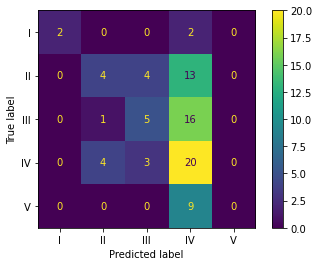

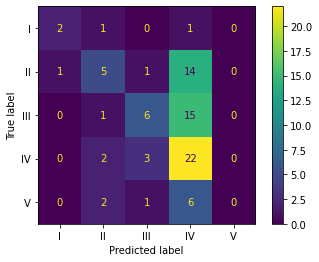

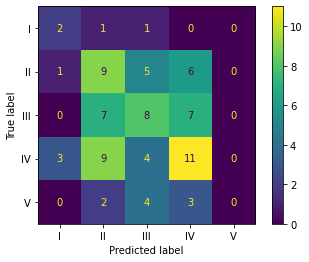

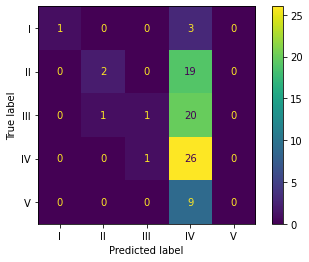

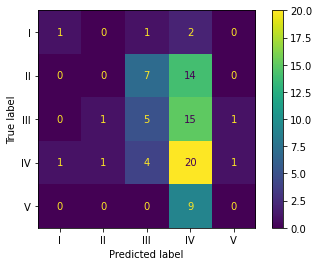

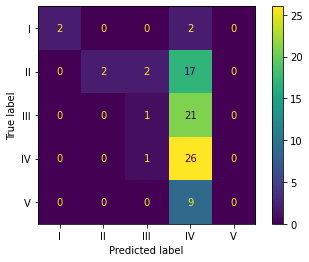

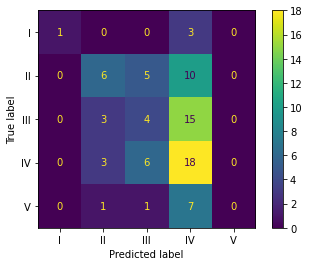

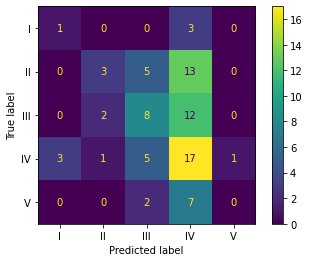

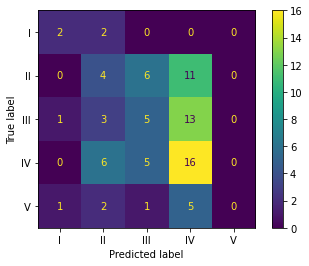

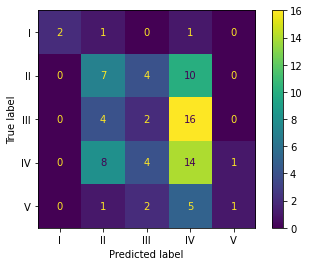

In [ ]:
result_df = ml_models(X_train_tf.toarray(), y_train, X_test_tf.toarray(), y_test)

For TF-IDF vectorization, the accuracy is quite less. Though Logistic Regression performs better than the rest, The accuracy is not upto the mark. Next better accuracy comes with Naive Bayes clasifier

In [ ]:
result_df

,Model,Train_accuracy,Test_accuracy,F1_score
0,LogReg,0.890244,0.890244,0.373494
1,Naive Bayes,1.000000,1.000000,0.421687
2,KNN,0.591463,0.591463,0.361446
3,SVM,0.990854,0.990854,0.361446
4,Decision Tree,0.512195,0.512195,0.313253
5,RandomForest,0.612805,0.612805,0.373494
6,Bagging,1.000000,1.000000,0.373494
7,AdaBoost,0.393293,0.393293,0.349398
8,Gradient Boost,0.920732,0.920732,0.325301
9,XGBoost,0.951220,0.951220,0.313253


Using Bag of words

A bag-of-words is a representation of text that describes the occurrence of words within a document.

In [ ]:
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
!pwd

/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot


ML Classifiers

LogReg
              precision    recall  f1-score   support

           I       1.00      0.50      0.67         4
          II       0.50      0.48      0.49        21
         III       0.38      0.36      0.37        22
          IV       0.42      0.63      0.51        27
           V       0.00      0.00      0.00         9

    accuracy                           0.45        83
   macro avg       0.46      0.39      0.41        83
weighted avg       0.41      0.45      0.42        83

Naive Bayes
              precision    recall  f1-score   support

           I       0.60      0.75      0.67         4
          II       0.33      0.19      0.24        21
         III       0.62      0.23      0.33        22
          IV       0.38      0.81      0.52        27
           V       0.00      0.00      0.00         9

    accuracy                           0.41        83
   macro avg       0.39      0.40      0.35        83
weighted avg       0.40      0.41      0.35        83

KNN

,model,Train_accuracy,Test_accuracy,F1_score
0,LogReg,1.000000,1.000000,0.445783
1,Naive Bayes,1.000000,1.000000,0.409639
2,KNN,0.356707,0.356707,0.277108
3,SVM,0.966463,0.966463,0.385542
4,Decision Tree,0.463415,0.463415,0.349398
5,RandomForest,0.448171,0.448171,0.337349
6,Bagging,1.000000,1.000000,0.397590
7,AdaBoost,0.420732,0.420732,0.301205
8,Gradient Boost,0.841463,0.841463,0.349398
9,XGBoost,0.929878,0.929878,0.385542


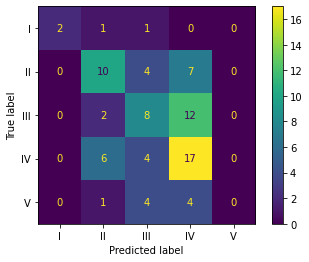

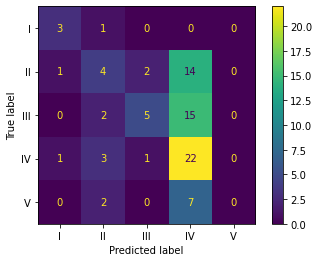

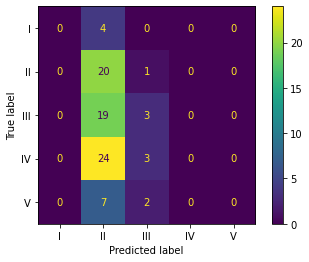

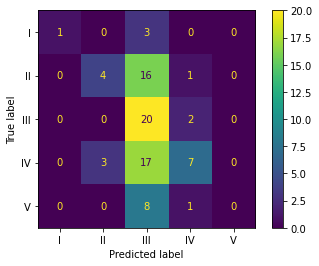

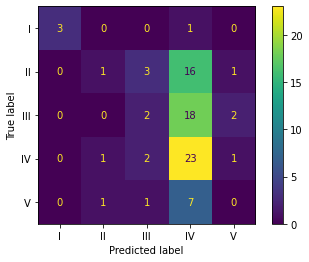

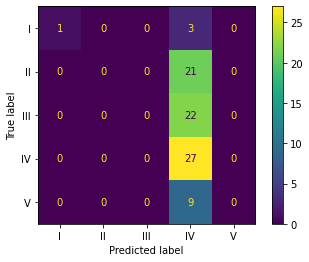

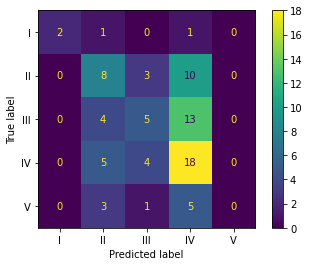

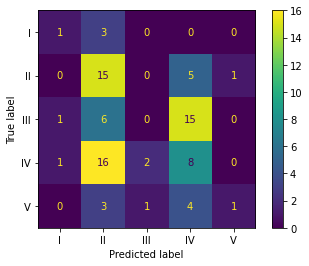

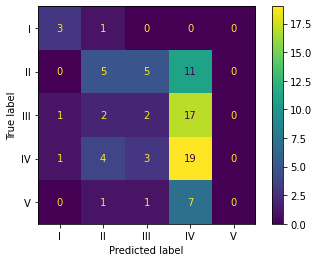

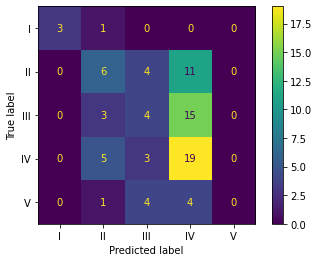

In [ ]:
ml_models(X_train_bow.toarray(), y_train, X_test_bow.toarray(), y_test)

The accuracy using BOW is more or less similar to those we got using TF-IDF

## ANN Models

In [ ]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, LSTM,  Embedding, Dropout, Bidirectional, GlobalMaxPool1D, BatchNormalization

#from keras.utils import np_utils
#from keras.layers.merge import Concatenate
#from keras.utils import plot_model


from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(industry_df['Description_preprocessed'], industry_df['Potential_Accident_Level'].values, test_size=0.2, random_state=42)

In [ ]:
# Initializing TfidfVectorizer object
tfIdfVectorizer = TfidfVectorizer()
X_train_tf = tfIdfVectorizer.fit_transform(X_train)
X_test_tf = tfIdfVectorizer.transform(X_test)

In [ ]:
# Converting the categorical values to one-hot encoding
y_train_new = pd.get_dummies(y_train)
y_test_new = pd.get_dummies(y_test)

In [ ]:
epochs = 10
batch_size = 12
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=3)

# Build neural network
tfidf_model = Sequential()
tfidf_model.add(Dense(512, activation='relu'))
tfidf_model.add(Dense(256, activation='relu'))
tfidf_model.add(Dense(5, activation='softmax'))
tfidf_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)

In [ ]:
history_nn = tfidf_model.fit(X_train_tf.toarray(), y_train_new, validation_split = 0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/10
22/22 [==============================] - 0s 18ms/step - loss: 5.7480e-04 - accuracy: 1.0000 - val_loss: 1.5567 - val_accuracy: 0.5152
Epoch 2/10
22/22 [==============================] - 0s 16ms/step - loss: 5.0372e-04 - accuracy: 1.0000 - val_loss: 1.5665 - val_accuracy: 0.5152
Epoch 3/10
22/22 [==============================] - 0s 14ms/step - loss: 4.4456e-04 - accuracy: 1.0000 - val_loss: 1.5759 - val_accuracy: 0.5152
Epoch 4/10
22/22 [==============================] - 0s 14ms/step - loss: 3.9434e-04 - accuracy: 1.0000 - val_loss: 1.5875 - val_accuracy: 0.5152


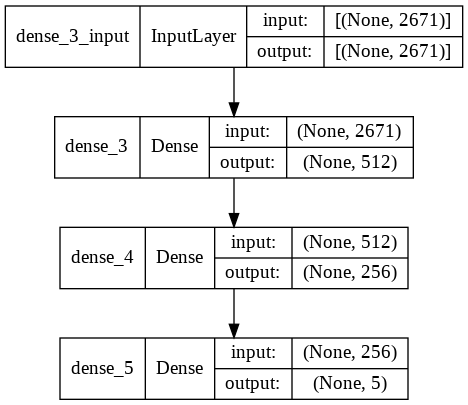

In [ ]:
# ann_viz(tfidf_model, view=True, filename="tfidf_model")
tf.keras.utils.plot_model(tfidf_model, to_file='tfidf_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Validating the model on test set
loss, accuracy = tfidf_model.evaluate(X_test_tf.toarray(), y_test_new, verbose = 0)
loss, accuracy

(2.0812718868255615, 0.4337349534034729)

In [ ]:
_,tr_accuracy = tfidf_model.evaluate(X_train_tf.toarray(),y_train_new) 
_,te_accuracy = tfidf_model.evaluate(X_test_tf.toarray(),y_test_new) 

y_pred = tfidf_model.predict(X_test_tf.toarray())
y_pred_index = np.argmax(y_pred,axis=1)
y_original = np.argmax(np.array(y_test_new), axis =1) 

F1_sre= f1_score(y_original,y_pred_index, average='micro')
tr_accuracy,te_accuracy,F1_sre

3/3 [==============================] - 0s 8ms/step - loss: 2.0813 - accuracy: 0.4337


(0.9024389982223511, 0.4337349534034729, 0.43373493975903615)

In [ ]:
result_df.loc[len(result_df.index)] = ['ANN_Model', tr_accuracy, te_accuracy,F1_sre] 
result_df

,Model,Train_accuracy,Test_accuracy,F1_score
0,LogReg,0.890244,0.890244,0.373494
1,Naive Bayes,1.000000,1.000000,0.421687
2,KNN,0.591463,0.591463,0.361446
3,SVM,0.990854,0.990854,0.361446
4,Decision Tree,0.512195,0.512195,0.313253
5,RandomForest,0.612805,0.612805,0.373494
6,Bagging,1.000000,1.000000,0.373494
7,AdaBoost,0.393293,0.393293,0.349398
8,Gradient Boost,0.920732,0.920732,0.325301
9,XGBoost,0.951220,0.951220,0.313253


In [ ]:
# define a function for plotting the progress of training
def plot_history(history):

  hist = pd.DataFrame(history.history)

  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('loss')
  plt.plot(hist['loss'],label= 'Train error')
  plt.plot(hist['val_loss'],label='Val error')
  plt.legend()
  plt.ylim([0,5])
  
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.plot(hist['accuracy'],label = 'Train accuracy')
  plt.plot(hist['val_accuracy'],label='Val_accuracy')
  plt.legend()
  plt.ylim([0,5])

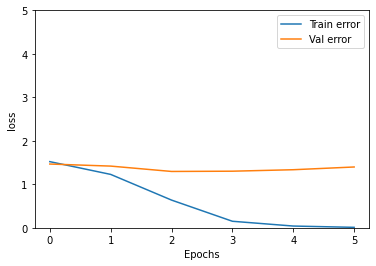

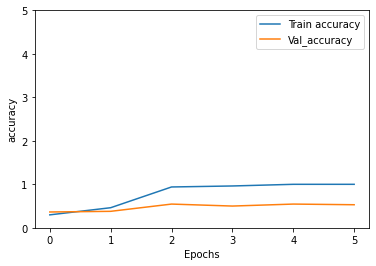

In [ ]:
plot_history(history_nn)

In [ ]:
print(classification_report(y_original, y_pred_index))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.44      0.38      0.41        21
           2       0.43      0.45      0.44        22
           3       0.41      0.56      0.47        27
           4       0.00      0.00      0.00         9

    accuracy                           0.43        83
   macro avg       0.41      0.43      0.41        83
weighted avg       0.40      0.43      0.41        83



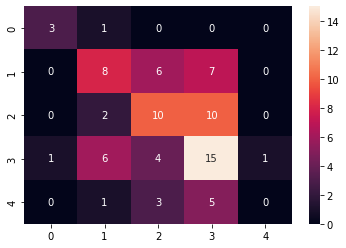

In [ ]:
sns.heatmap(confusion_matrix(y_original,y_pred_index),annot = True);

## LSTM Model

In [ ]:
industry_df = pd.read_csv("industry_df_with_stopwords.csv")

In [ ]:
pd.crosstab(industry_df['Accident_Level'],industry_df['Potential_Accident_Level'])

Potential_Accident_Level,I,II,III,IV,V
Accident_Level,,,,,
I,43,88,89,75,8
II,0,7,14,16,2
III,0,0,3,26,2
IV,0,0,0,21,9
V,0,0,0,0,8


From the cross tab we can see that most of the potential accident level are categorsied under Accident level 'I". Potential accident level 2,3 and 4 have more data compared to 1 and 5. Level 5 has least data.

In [ ]:
industry_df['Potential_Accident_Level'].value_counts()

IV     138
III    106
II      95
I       43
V       29
Name: Potential_Accident_Level, dtype: int64

In [ ]:
industry_df['Accident_Level'].value_counts()

I      303
II      39
III     31
IV      30
V        8
Name: Accident_Level, dtype: int64

The accident level data is not uniformly distributed. Most of the data is skewed to Level 1.

We can take the Preprocessed description (texts) as our features and the Potential accident level as our Targets for LSTM Model.

In [ ]:
# Select input and output features

X_text = industry_df['Description_preprocessed']
y_text = industry_df['Potential_Accident_Level']

Since the data is in string format we need to label encode it and to pass it to the deep learning model we need to one hot encode it.

In [ ]:
# Encode labels in column 'Potential Accident Level'and Convert into one-hot encoded vectors:
y_text = LabelEncoder().fit_transform(y_text)
y_text = to_categorical(y_text)

In [ ]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1)

print('X_text_train shape : ({0})'.format(X_text_train.shape))
print('y_text_train shape : ({0},)'.format(y_text_train.shape))
print('X_text_test shape : ({0})'.format(X_text_test.shape))
print('y_text_test shape : ({0},)'.format(y_text_test.shape))

X_text_train shape : ((328,))
y_text_train shape : ((328, 5),)
X_text_test shape : ((83,))
y_text_test shape : ((83, 5),)


We need to tokenise our data to convert the text data into numbers.

In [ ]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
industry_df['nb_words'] = industry_df['Description_preprocessed'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(industry_df['nb_words'].min()))
print('Maximum number of words: {}'.format(industry_df['nb_words'].max()))

Minimum number of words: 16
Maximum number of words: 183


The maximum number of words in our data including stopwords  is 183. Based on this we can fix our maximum length of our data will be 185.

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 185

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 2841


The Vocabulary size of the data is 2841. (Total number of words in our data).

In [ ]:
%cd /content/drive/MyDrive/AIML/Capstone

/content/drive/MyDrive/AIML/Capstone


Glove 6B To 200D Embedding took from this source http://nlp.stanford.edu/data/glove.6B.zip, it saved in drive and convert it into dictionary file

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
print('Indexing word vectors.')

embeddings_dictionary = {}
f = open('glove.6B.200d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_dictionary))

Indexing word vectors.
Found 400000 word vectors.


In [ ]:
import pickle
pickle.dump(embeddings_dictionary, open('/content/drive/MyDrive/AIML/Capstone/embeddings.pickle', 'wb'))

In [ ]:
import pickle
infile = open('/content/drive/MyDrive/AIML/Capstone/embeddings.pickle','rb')
embeddings_dictionary = pickle.load(infile)

We Pickled the Glove Embedding dictionary file for future use.

In [ ]:
embedding_size = 200

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(2841, 200)

The Created embedding matrix is of shape 2841 * 200

In [ ]:
base_model = Sequential()
base_model.add(Embedding(vocab_size, output_dim=embedding_size, weights=[embedding_matrix], input_length=185, trainable=False))
#LSTM 
base_model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
base_model.add(Dense(5, activation='softmax'))
base_model.compile(optimizer=optimizers.Adam(lr = 0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 185, 200)          568200    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               336896    
_________________________________________________________________
dense (Dense)                (None, 5)                 1285      
Total params: 906,381
Trainable params: 338,181
Non-trainable params: 568,200
_________________________________________________________________


In [ ]:
X_text_train.shape,y_text_train.shape,X_text_test.shape, y_text_test.shape

((328, 185), (328, 5), (83, 185), (83, 5))

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.001, patience=3, min_delta=1E-4)

# fit the keras model on the dataset
base_model_history = base_model.fit(X_text_train, y_text_train, epochs=10, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp])

In [ ]:
_, train_accuracy = base_model.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
_, test_accuracy = base_model.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 83.84
Test accuracy: 38.55


Clearlt, the base model without dense layers overfit the data. Let us add more dense layers to our LSTM Layers.

In [ ]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal = self.validation_data
        val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

- We are Using Bidirectional LSTM model with 128 units.
- A Embedding layer before the LSTM layer.
- Global Max pool out layer.
- 5 dense layers to gradually reduce the nodes and 5 drop out layers.
- Optimiser - Adam, loss - Categorical Cross Entropy

In [ ]:

# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)

lstm_model = Model(inputs=deep_inputs, outputs=dense_layer_5)

opt = optimizers.Adam(lr=0.001)
#opt = optimizers.SGD(lr=0.0001, momentum=0.9)
lstm_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
print(lstm_model.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 185)]             0         
                                                                 
 embedding_17 (Embedding)    (None, 185, 200)          568200    
                                                                 
 bidirectional_17 (Bidirecti  (None, 185, 256)         336896    
 onal)                                                           
                                                                 
 global_max_pooling1d_8 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_40 (Dropout)        (None, 256)               0         
                                                                 
 dense_49 (Dense)            (None, 128)               3289

In [ ]:
!pip install plot_model

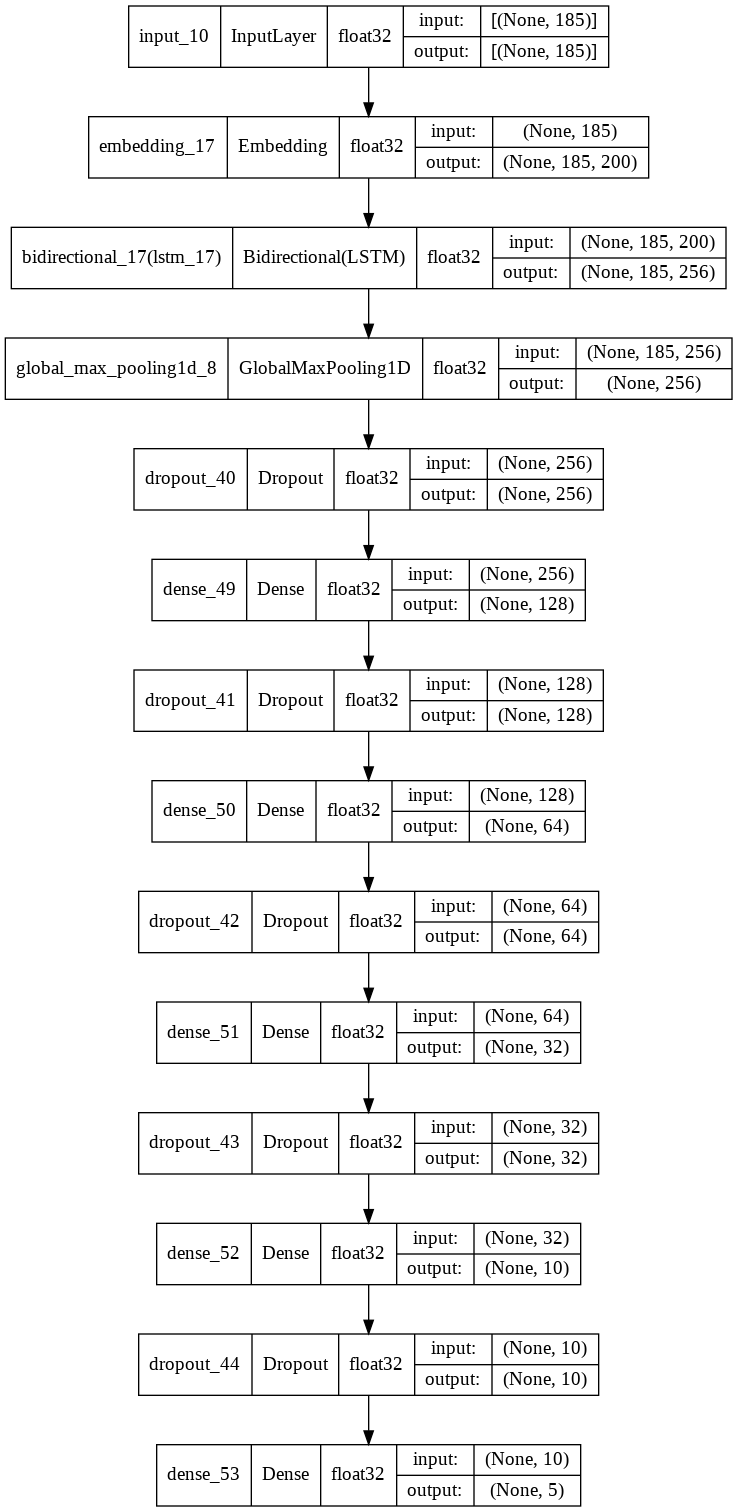

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(lstm_model, to_file='model.png', show_shapes=True, show_dtype=True,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.001, patience=3, min_delta=1E-4)

metrics = Metrics(validation_data=(X_text_train, y_text_train))

# fit the keras model on the dataset
training_history = lstm_model.fit(X_text_train, y_text_train, epochs=10, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp])

Epoch 1/30
41/41 [==============================] - 17s 338ms/step - loss: 1.6385 - acc: 0.2530 - val_loss: 1.5722 - val_acc: 0.2530 - lr: 0.0010
Epoch 2/30
41/41 [==============================] - 13s 312ms/step - loss: 1.5835 - acc: 0.2988 - val_loss: 1.5423 - val_acc: 0.3735 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 13s 312ms/step - loss: 1.5904 - acc: 0.2866 - val_loss: 1.5536 - val_acc: 0.3735 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 13s 311ms/step - loss: 1.5711 - acc: 0.2713 - val_loss: 1.5196 - val_acc: 0.3012 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 13s 310ms/step - loss: 1.5650 - acc: 0.2957 - val_loss: 1.5334 - val_acc: 0.3735 - lr: 0.0010
Epoch 6/30
41/41 [==============================] - 13s 313ms/step - loss: 1.5292 - acc: 0.3323 - val_loss: 1.5261 - val_acc: 0.3735 - lr: 0.0010
Epoch 7/30
41/41 [==============================] - 13s 313ms/step - loss: 1.5601 - acc: 0.3079 - val_loss: 1.5258 - val_acc

In [ ]:
# evaluate the keras model
_, train_accuracy = lstm_model.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
_, test_accuracy = lstm_model.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 32.62
Test accuracy: 37.35


This models have moreover same train and test accuracy but both the accuacy are the very low. We need to built moew complex models to increase the accuracy.

In [ ]:
lstm_model_json = lstm_model.to_json()
with open("LSTM_model.json", "w") as json_file:
    json_file.write(lstm_model_json)
    
# serialize weights to HDF5
lstm_model.save_weights("LSTM_model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
lstm_model.save("finalized_LSTM_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


In [ ]:
ls_model = load_model(r"/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/Models/LSTM_model.h5")

In [ ]:
y_pred = ls_model.predict(X_text_test, verbose=0) # Multiclass
y_pred_index = np.argmax(y_pred,axis=1)
y_original = np.argmax(y_text_test, axis =1)

In [ ]:
_,tr_accuracy = ls_model.evaluate(X_text_train,y_text_train) 
_,te_accuracy = ls_model.evaluate(X_text_test,y_text_test) 

F1_sre= f1_score(y_orginal,y_pred_index, average='micro')
tr_accuracy,te_accuracy,F1_sre

3/3 [==============================] - 0s 151ms/step - loss: 1.5414 - acc: 0.3735


(0.32621949911117554, 0.3734939694404602, 0.3253012048192771)

In [ ]:
result_df.loc[len(result_df.index)] = ['LSTM_Model', tr_accuracy, te_accuracy,F1_sre] 
result_df

,Model,Train_accuracy,Test_accuracy,F1_score
0,LogReg,0.890244,0.890244,0.373494
1,Naive Bayes,1.000000,1.000000,0.421687
2,KNN,0.591463,0.591463,0.361446
3,SVM,0.990854,0.990854,0.361446
4,Decision Tree,0.512195,0.512195,0.313253
5,RandomForest,0.612805,0.612805,0.373494
6,Bagging,1.000000,1.000000,0.373494
7,AdaBoost,0.393293,0.393293,0.349398
8,Gradient Boost,0.920732,0.920732,0.325301
9,XGBoost,0.951220,0.951220,0.313253


- From all these models. Naive bayes and bagging model clearly overfits.
- SVM model, Gradient Boost and XG Boost have pretty good train and test accuracy but low F1 Score.
- ANN model have good train accuracy but very low test accuracy and F1 Score.
- LSTM model have equal Train, Test and F1 Score but everything is very low.

In [ ]:
with open('/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/result_df.csv', "wb") as f:
  pickle.dump((result_df), f)

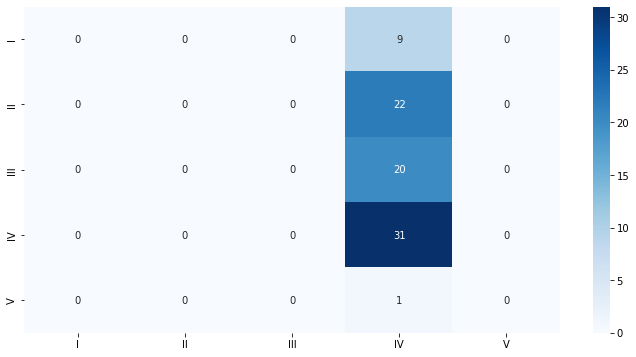

In [ ]:
cm = confusion_matrix(y_original,y_pred_index)
cm_label = ['I', 'II', 'III','IV', 'V']
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels = cm_label, yticklabels = cm_label);

The Model is predicting all the data is Potential accident level 4, so clearly the model is not performing good.

In [ ]:
print(classification_report(y_original, y_pred_index))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        20
           3       0.37      1.00      0.54        31
           4       0.00      0.00      0.00         1

    accuracy                           0.37        83
   macro avg       0.07      0.20      0.11        83
weighted avg       0.14      0.37      0.20        83



Similary we are getting very low Macro average F1 Score.

Text(0.5, 1.0, 'Training and validation loss')

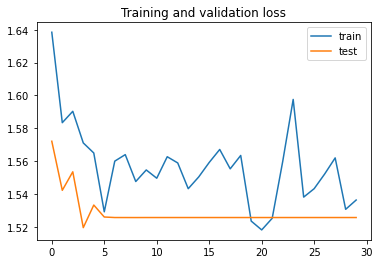

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

After 5 epochs the validation loss doesn't change, since we have very low volume of data for validation.

Text(0.5, 1.0, 'Training and validation accuracy')

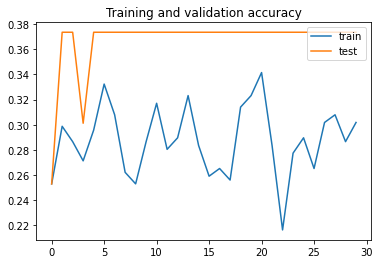

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

- The Validation accuracy stays constant after few epochs, the model is clearly unable to learn with validation data.
- The Training accuracy is jumping between 23-37 %.


In [ ]:
# to pickle the files dont run
with open('/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/Utilities/parameters.pickle', "wb") as f:
  pickle.dump((le, tokenizer), f)

In [ ]:
def model_prediction(usr_txt):
  with open('/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/Utilities/parameters.pickle', "rb") as f:
      lab_en, tokenizer_data = pickle.load(f)
  from NLP_text_preprocess import PreProcessing
  pp = PreProcessing(to_lower = config.to_lower,remove_url=config.remove_url,
                   remove_time = config.remove_time,expand_contraction =config.expand_contraction,
                   remove_special_character=config.remove_special_character,
                   remove_punctuation=config.remove_punctuation,
                   remove_whitespace=config.remove_whitespace,
                   keep_alpha_numeric = False,
                   check_spelling=config.check_spelling,
                   remove_stopword=False,
                   lemmatize_word=config.lemmatize_word)

  pre_txt = pp.preprocess(usr_txt)
  tok_txt = tokenizer_data.texts_to_sequences([pre_txt])
  pad_txt = pad_sequences(tok_txt, padding='post', maxlen=185)
  prediction = ls_model.predict(pad_txt, verbose=0)
  pred_index = np.argmax(prediction,axis=1)
  result = lab_en.inverse_transform(pred_index)[0]
  return print('The Potential accident level is', result)

In [ ]:
model_prediction(industry_df['Description_preprocessed'][1])

The Potential accident level is IV


From the LSTM model we did a sample prediction and displaye above.

## Hybrid Model (NN with categorical data+LSTM Model with text data)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [ ]:
industry_df_1 = pd.read_csv("industry_df_preprocessed.csv")

In [ ]:
industry_df_1.head()

,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_type,Critical_Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Description_preprocessed
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,removing drill rod jumbo 08 maintenance superv...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,activation sodium sulphide pump piping uncoupl...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,substation milo located level 170 collaborator...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer,approximately 1880 cx695 ob personnel begin ta...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer,approximately circumstance mechanic anthony gr...


**Preprocessing for categorical features**

In [ ]:
# To replace white space everywhere in Employee type and Critical Risk
industry_df_1['Employee_type'] = industry_df_1['Employee_type'].str.replace(' ', '_')
industry_df_1['Critical_Risk'] = industry_df_1['Critical_Risk'].str.replace('\n', '').str.replace(' ', '_')

In [ ]:
# Create categorical inputs DataFrame
cat_featenc_df = pd.DataFrame()

# Label encoding
industry_df_1['Season'] = industry_df_1['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
cat_featenc_df['Season'] = LabelEncoder().fit_transform(industry_df_1['Season']).astype(np.int8)

industry_df_1['Weekday'] = industry_df_1['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
cat_featenc_df['Weekday'] = LabelEncoder().fit_transform(industry_df_1['Weekday']).astype(np.int8)

cat_featenc_df['Accident_Level'] = LabelEncoder().fit_transform(industry_df_1['Accident_Level']).astype(np.int8)
cat_featenc_df['Potential_Accident_Level'] = LabelEncoder().fit_transform(industry_df_1['Potential_Accident_Level']).astype(np.int8)

In [ ]:
#Creating dummy variables for categoricalinputs
Dummy_frame = pd.get_dummies(industry_df_1[['Country','Local','Gender','Industry_Sector','Employee_type','Critical_Risk']], columns=['Country','Local','Gender','Industry_Sector','Employee_type','Critical_Risk'],prefix=['','','','IS','EmpType','CR'],prefix_sep=['','','','_','_','_'], drop_first=True)

# Merge the above dataframe with the original dataframe cat_featenc_df
cat_featenc_df = cat_featenc_df.join(Dummy_frame.reset_index(drop=True))

cat_featenc_df = industry_df_1[['Year','Month','Day','WeekofYear']].reset_index(drop=True).join(cat_featenc_df.reset_index(drop=True))

cat_featenc_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident_Level,Potential_Accident_Level,Country_02,Country_03,...,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco
0,2016,1,1,53,0,4,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,1,2,53,0,5,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,1,6,1,0,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Select input and output features
X_cat = cat_featenc_df.drop(['Accident_Level','Potential_Accident_Level'], axis = 1)
y_cat = cat_featenc_df['Potential_Accident_Level']

# Divide our data into testing and training sets:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size = 0.20, random_state = 1, stratify = y_cat)

print('X_cat_train shape : ({0})'.format(X_cat_train.shape[0]))
print('y_cat_train shape : ({0},)'.format(y_cat_train.shape[0]))
print('X_cat_test shape : ({0})'.format(X_cat_test.shape[0]))
print('y_cat_test shape : ({0},)'.format(y_cat_test.shape[0]))

# Convert both the training and test labels into one-hot encoded vectors:
y_cat_train = to_categorical(y_cat_train)
y_cat_test = to_categorical(y_cat_test)

# Variable transformation using StandardScaler
scaler_X = StandardScaler()
X_cat_train.iloc[:,:6] = scaler_X.fit_transform(X_cat_train.iloc[:,:6]) # Scaling only first 6 feautres

X_cat_test.iloc[:,:6] = scaler_X.transform(X_cat_test.iloc[:,:6]) # Scaling only first 6 feautres

X_cat_train shape : (328)
y_cat_train shape : (328,)
X_cat_test shape : (83)
y_cat_test shape : (83,)


**Hybrid model with text data and categorical data**

In [ ]:
#This is lstm model for text data
input_1 = Input(shape=(maxlen,))
embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

#-------------------------------------------------------------------------------
#This is Neural network to process categorical variables
param = 1e-4

input_2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_5       = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                      kernel_constraint=unit_norm())(input_2)
drop_out_layer_6    = Dropout(0.2)(dense_layer_5)
batch_norm_layer_1  = BatchNormalization()(drop_out_layer_6)
dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                            kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

concat_layer        = Concatenate()([drop_out_layer_5, batch_norm_layer_2])
dense_layer_7       = Dense(10, activation='relu')(concat_layer)
output  = Dense(5, activation='softmax')(dense_layer_7)
hybrid_model   = Model(inputs=[input_1, input_2], outputs=output)

# compile the model
opt = SGD(lr=0.001, momentum=0.9)
hybrid_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
print(hybrid_model.summary())

Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           [(None, 185)]        0                                            
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 185, 200)     568200      input_35[0][0]                   
__________________________________________________________________________________________________
bidirectional_16 (Bidirectional (None, 185, 256)     336896      embedding_16[0][0]               
__________________________________________________________________________________________________
global_max_pooling1d_15 (Global (None, 256)          0           bidirectional_16[0][0]           
______________________________________________________________________________________

In [ ]:
plot_model(hybrid_model, to_file='hybrid_model.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

#target_type = 'multi_label'
#, target_type
metrics = Metrics(validation_data=([X_text_train, X_cat_train], y_cat_train))

# fit the keras model on the dataset
training_history = hybrid_model.fit([X_text_train, X_cat_train], y_cat_train, epochs=50, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/50
41/41 [==============================] - 12s 296ms/step - loss: 1.6375 - acc: 0.2134 - val_loss: 1.5680 - val_acc: 0.2771
Epoch 2/50
41/41 [==============================] - 8s 207ms/step - loss: 1.6129 - acc: 0.2774 - val_loss: 1.5594 - val_acc: 0.3133
Epoch 3/50
41/41 [==============================] - 8s 199ms/step - loss: 1.5414 - acc: 0.2896 - val_loss: 1.5442 - val_acc: 0.3253
Epoch 4/50
41/41 [==============================] - 8s 199ms/step - loss: 1.5338 - acc: 0.3689 - val_loss: 1.5328 - val_acc: 0.2892
Epoch 5/50
41/41 [==============================] - 8s 202ms/step - loss: 1.5297 - acc: 0.3445 - val_loss: 1.5213 - val_acc: 0.2771
Epoch 6/50
41/41 [==============================] - 8s 197ms/step - loss: 1.5077 - acc: 0.3140 - val_loss: 1.5110 - val_acc: 0.2771
Epoch 7/50
41/41 [==============================] - 8s 194ms/step - loss: 1.5157 - acc: 0.3506 - val_loss: 1.5027 - val_acc: 0.2771
Epoch 8/50
41/41 [==============================] - 8s 206ms/step - loss: 1

In [ ]:
# evaluate the keras model
_, train_accuracy = hybrid_model.evaluate([X_text_train, X_cat_train], y_cat_train, batch_size=8, verbose=0)
_, test_accuracy = hybrid_model.evaluate([X_text_test, X_cat_test], y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 37.50
Test accuracy: 32.53


Text(0.5, 1.0, 'Training and validation loss')

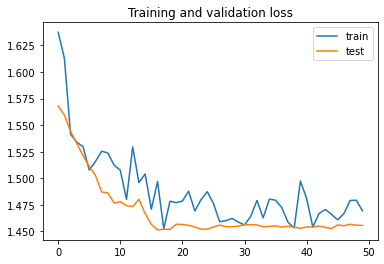

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

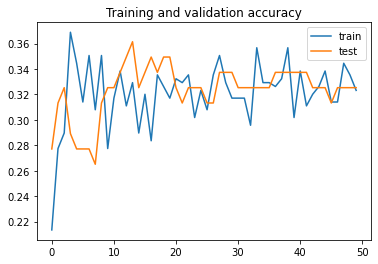

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

Train accuracy is fluctuating around 30 value. Test accuracy fluctuted upto 30 epochs, later it is settled at around 32.

This might be due to less data available.

In [ ]:
hybrid_model_json = hybrid_model.to_json()
with open("Hybrid_model.json", "w") as json_file:
    json_file.write(hybrid_model_json)
    
# serialize weights to HDF5
hybrid_model.save_weights("HYBRID_model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
hybrid_model.save("finalized_Hybrid_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


In [ ]:
#hd_model = load_model(r"/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/Models/HYBRID_model.h5")
hd_model = load_model(r"C:\Users\200488052\Downloads\ML\GL\Capstone\Jan-G4---NLP-Chatbot-main\finalized_Hybrid_model.h5")

y_pred = hd_model.predict([X_text_test, X_cat_test], verbose=0) # Multiclass
y_pred_index = np.argmax(y_pred,axis=1)
y_original = np.argmax(y_cat_test, axis =1)

In [ ]:
_,tr_accuracy = hd_model.evaluate([X_text_train, X_cat_train],y_cat_train) 
_,te_accuracy = hd_model.evaluate([X_text_test, X_cat_test],y_cat_test) 

F1_sre= f1_score(y_original,y_pred_index, average='micro')
tr_accuracy,te_accuracy,F1_sre

3/3 [==============================] - 0s 86ms/step - loss: 1.4220 - acc: 0.3012


(0.37195122241973877, 0.3012048304080963, 0.30120481927710846)

In [ ]:
result_df.loc[len(result_df.index)] = ['HYBRID_Model', tr_accuracy, te_accuracy,F1_sre] 
result_df

In [ ]:
with open('/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/result_df.csv', "wb") as f:
  pickle.dump((result_df), f)

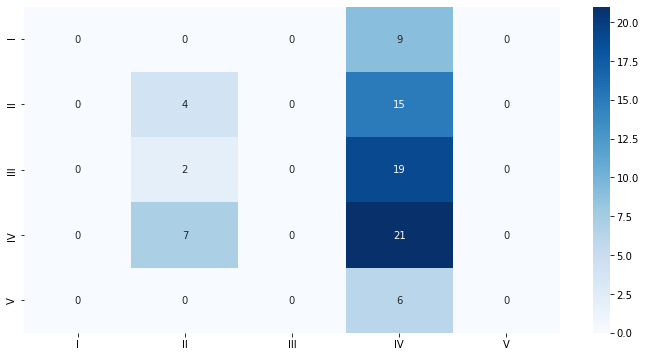

In [ ]:
cm = confusion_matrix(y_original,y_pred_index)
cm_label = ['I', 'II', 'III','IV', 'V']
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels = cm_label, yticklabels = cm_label);

In [ ]:
print(classification_report(y_original, y_pred_index))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.31      0.21      0.25        19
           2       0.00      0.00      0.00        21
           3       0.30      0.75      0.43        28
           4       0.00      0.00      0.00         6

    accuracy                           0.30        83
   macro avg       0.12      0.19      0.14        83
weighted avg       0.17      0.30      0.20        83



## CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

In [ ]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 58
    output_nodes = 5

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(X_cat_train.shape[1],), activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(29, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(14, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_cat_train, y_cat_train, epochs=iterations, batch_size=8, verbose= 1)
    score = model.evaluate(X_cat_train, y_cat_train, verbose=0)
    print(('This is test set score:'+str(model.evaluate(X_cat_test, y_cat_test, verbose=0))))
    return score,model

In [ ]:
import math
for k in range(1,11):
    lr = math.pow(10, np.random.uniform(-6.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-6,-2))
    best_acc,model = train_and_test_loop(30, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Epoch 1/30
41/41 [==============================] - 0s 2ms/step - loss: 1.7987 - accuracy: 0.2226
Epoch 2/30
41/41 [==============================] - 0s 2ms/step - loss: 1.5721 - accuracy: 0.3323
Epoch 3/30
41/41 [==============================] - 0s 2ms/step - loss: 1.4989 - accuracy: 0.3293
Epoch 4/30
41/41 [==============================] - 0s 2ms/step - loss: 1.4766 - accuracy: 0.3323
Epoch 5/30
41/41 [==============================] - 0s 2ms/step - loss: 1.4305 - accuracy: 0.3872
Epoch 6/30
41/41 [==============================] - 0s 2ms/step - loss: 1.4005 - accuracy: 0.3872
Epoch 7/30
41/41 [==============================] - 0s 2ms/step - loss: 1.3960 - accuracy: 0.3963
Epoch 8/30
41/41 [==============================] - 0s 2ms/step - loss: 1.4107 - accuracy: 0.3323
Epoch 9/30
41/41 [==============================] - 0s 2ms/step - loss: 1.4089 - accuracy: 0.3598
Epoch 10/30
41/41 [==============================] - 0s 3ms/step - loss: 1.3871 - accuracy: 0.3415
Epoch 11/30
41/41 [

From the above, we understand that lr: 0.001151587618713728, Lambda: 0.0002776611732646734 are giving good train and test accuracy

In [ ]:
lr=0.00115
Lambda=0.000277
best_acc,NN_model = train_and_test_loop(30, lr, Lambda, False)

Epoch 1/30
41/41 [==============================] - 0s 2ms/step - loss: 2.0367 - accuracy: 0.2043
Epoch 2/30
41/41 [==============================] - 0s 2ms/step - loss: 1.8225 - accuracy: 0.2348
Epoch 3/30
41/41 [==============================] - 0s 2ms/step - loss: 1.7368 - accuracy: 0.2561
Epoch 4/30
41/41 [==============================] - 0s 2ms/step - loss: 1.6718 - accuracy: 0.2713
Epoch 5/30
41/41 [==============================] - 0s 2ms/step - loss: 1.5823 - accuracy: 0.2774
Epoch 6/30
41/41 [==============================] - 0s 2ms/step - loss: 1.5627 - accuracy: 0.3079
Epoch 7/30
41/41 [==============================] - 0s 2ms/step - loss: 1.5268 - accuracy: 0.3201
Epoch 8/30
41/41 [==============================] - 0s 2ms/step - loss: 1.4847 - accuracy: 0.3567
Epoch 9/30
41/41 [==============================] - 0s 2ms/step - loss: 1.4767 - accuracy: 0.3506
Epoch 10/30
41/41 [==============================] - 0s 2ms/step - loss: 1.5058 - accuracy: 0.2988
Epoch 11/30
41/41 [

# Model Performance

In [ ]:
  with open('/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/Utilities/result_df.csv', "rb") as f:
      result_df = pickle.load(f)

In [ ]:
result_df

,Model,Train_accuracy,Test_accuracy,F1_score
0,LogReg,0.890244,0.890244,0.373494
1,Naive Bayes,1.000000,1.000000,0.421687
2,KNN,0.591463,0.591463,0.361446
3,SVM,0.990854,0.990854,0.361446
4,Decision Tree,0.512195,0.512195,0.313253
5,RandomForest,0.612805,0.612805,0.373494
6,Bagging,1.000000,1.000000,0.373494
7,AdaBoost,0.393293,0.393293,0.349398
8,Gradient Boost,0.920732,0.920732,0.325301
9,XGBoost,0.951220,0.951220,0.313253


- From all these models. Naive bayes and bagging model clearly overfits.
- SVM model, Gradient Boost and XG Boost have pretty good train and test accuracy but low F1 Score.
- ANN model have good train accuracy but very low test accuracy and F1 Score.
- LSTM model have equal Train, Test and F1 Score but everything is very low.

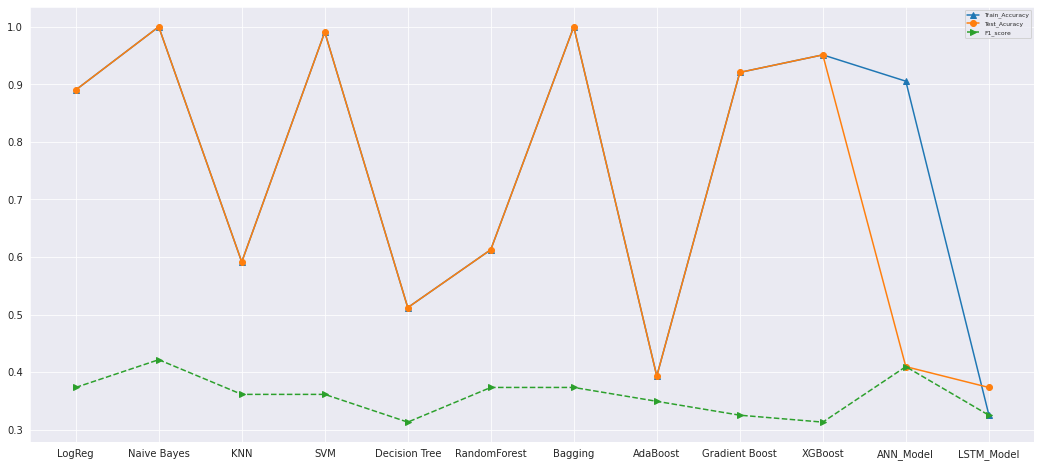

In [ ]:
plt.figure(figsize = (18,8))
sns.set_style("darkgrid")
plt.plot(result_df['Model'], result_df['Train_accuracy'], marker = '^', label = 'Train_Accuracy')
plt.plot(result_df['Model'], result_df['Test_accuracy'], marker = 'o', label = 'Test_Acuracy')
plt.plot(result_df['Model'], result_df['F1_score'], marker = '>', linestyle='--', label = 'F1_score')
plt.legend(fontsize = 6)
plt.show()

 - The Train, Test accuracy and F1 score varies drastically in machine learning models.
 - All three parametes are very close in LSTM model.

In [ ]:
result_df.set_index('Model', inplace = True)

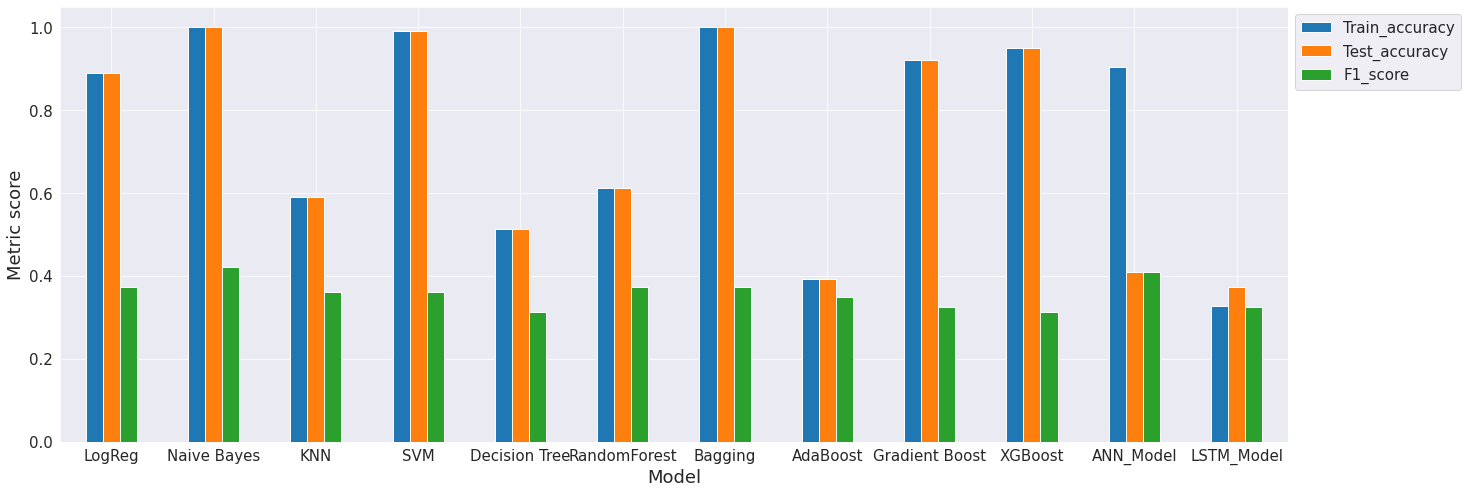

In [ ]:
ax = result_df.plot(kind='bar', rot = 0, figsize = (22,8), fontsize = 15) #,colormap='Pastel1') 
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
ax.set_ylabel("Metric score", fontsize=18)
ax.set_xlabel("Model", fontsize=18)
plt.show()

### Summary
- We Preprocessed the data, removed duplicates, removed instances of same description, checked outliers, Checked Missing data.
- We built a seperate library for NLP Text Preprocessing and created a configuration file to change the parameters.
- We Performed various EDA on the data and validated it through hypothesis testing 
- We have built 10 different Machine learning models, an Artificial Neural Network model and a LSTM model for analysis. 
- The Naive Bayes and Bagging model clearly overfits the data. 
- We have good train and test accuracy for logistic regression but low F1 score so we can neglect it. 
- The F1 scores are very less for all the models.
- The model with Higher F1 Score is ANN model, but still the model overfits with higher train accuracy and low test accuracy. 
- LSTM model have similar test, train accuracy and F1 score but all of them were pretty low.
- We need to build much more complex models to have better accuracy and predictions.
